# Import Libraries

In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as po
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Models
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

## Boosting Models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# Stacking models
from sklearn.ensemble import StackingClassifier, VotingClassifier

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support, PrecisionRecallDisplay
from sklearn.metrics import auc

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Data balancing
from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE

# Model Selection
from sklearn.model_selection import GridSearchCV
import eli5
from eli5.sklearn import PermutationImportance

In [205]:
# Import dataset
dataset = pd.read_csv('data.csv')
dataset.drop('Unnamed: 32', axis=1, inplace=True)

In [274]:
dataset.shape

(569, 31)

In [206]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Exploration

In [207]:
# General Statistics Of The Dataset
plt.style.use('seaborn-whitegrid')
cm = sns.light_palette("red", as_cmap=True)
dataset.drop(['id', 'diagnosis'], axis=1).describe(
    ).style.background_gradient(cmap=cm)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Maximum values of area features are very far from mean values, this may be an indication of an outlier

In [208]:
# Nulls Values And Dtypes Check
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Our Dataset is Clean And Has No Null Values, Also All Our Features Are Floats Except For The Target Column

In [209]:
# Check For Duplicates
dataset.duplicated().sum()

0

#### No Duplicates In Our Dataset

## Encode Our Categorical Column Which Is The Target Column

In [210]:
dataset.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

#### We Will Replace M Values With 1 And 0 to B values, M Means Malignant Or Canserous

In [211]:
dataset['diagnosis'].replace({'B':0, 'M':1}, inplace=True)

#### Also We See Here That Our Classes Are Not Balanced, And That's a Problem We Will Need To Deal With Later 

# Create a Base Model

#### Before Applying Any changes To The Data We Need To Creata a Base Model To Check For Every Change Whether It Improves Our Model Or Not

In [212]:
# Perform Train Test Split
def trainTestSplit(dataset):
    '''Splits dataset into x_train, x_test, y_train, y_test'''
    x = dataset.drop(['diagnosis'], axis=1)
    y = dataset['diagnosis']
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = trainTestSplit(dataset)

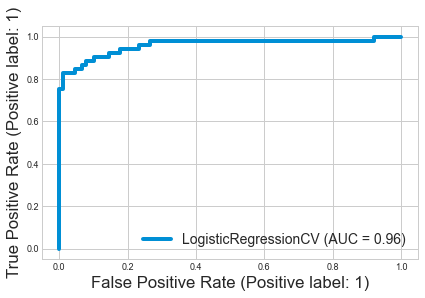

In [213]:
plot_roc_curve(LogisticRegressionCV().fit(x_train, y_train), x_test, y_test)

In [214]:
print('Train Datat Target Distribution is:\n', y_train.value_counts(normalize=True))
print('*' *30)
print('Test Datat Target Distribution is:\n', y_test.value_counts(normalize=True))


Train Datat Target Distribution is:
 0    0.626761
1    0.373239
Name: diagnosis, dtype: float64
******************************
Test Datat Target Distribution is:
 0    0.629371
1    0.370629
Name: diagnosis, dtype: float64


In [215]:
def f1_score_model(txt, x_train_, y_train_, x_test_, y_test_, print_msg=True,
       model=LogisticRegressionCV(cv=10, class_weight='balanced', max_iter=10000)):
    '''
        returns average f1_score
        
        parameters:
            txt: Message to print after getting the score
            x_train: Features of the train data
            x_test: Features of the test data
            y_train: Target feature of the train data
            y_test: Target feature of the test data
    '''
    # Training the model
    model.fit(x_train_, y_train_)
    y_pred = model.predict(x_test_)

    # f1 score
    score = f1_score(y_test_, y_pred)
    if print_msg:
        print(f"The {txt} is {score:0.04f}")
    return score

In [216]:
f1_score_model("basemodel score", x_train, y_train, x_test, y_test)

The basemodel score is 0.5408


0.5408163265306123

# Check For Outliers

In [217]:
columns = dataset.drop(['id', 'diagnosis'], axis=1).columns.tolist()

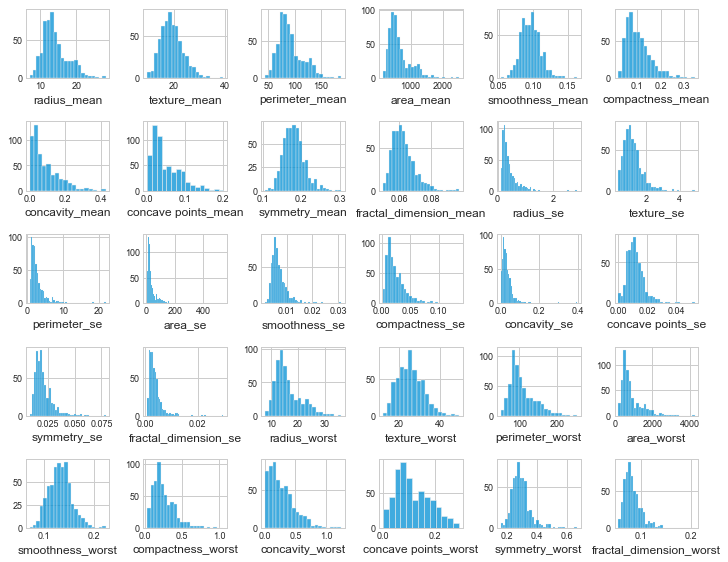

In [218]:
def hist_plot_matrix(row, col, dataset, columns):
    matplotlib.rc('xtick', labelsize=9)
    matplotlib.rc('ytick', labelsize=9)
    fig, axs = plt.subplots(nrows=row, ncols=col)
    fig.set_figheight(8)
    fig.set_figwidth(10)
    j = 0
    k = 0
    for i in range(row * col):
        if j == col:
            j = 0
            k += 1
        sns.histplot(ax=axs[k, j], x=columns[i], data=dataset)
        axs[k, j].set(ylabel=None)
        axs[k, j].set_xlabel(columns[i], fontsize=12)
        j += 1
    fig.tight_layout(pad=1)

hist_plot_matrix(5, 6, dataset, columns)

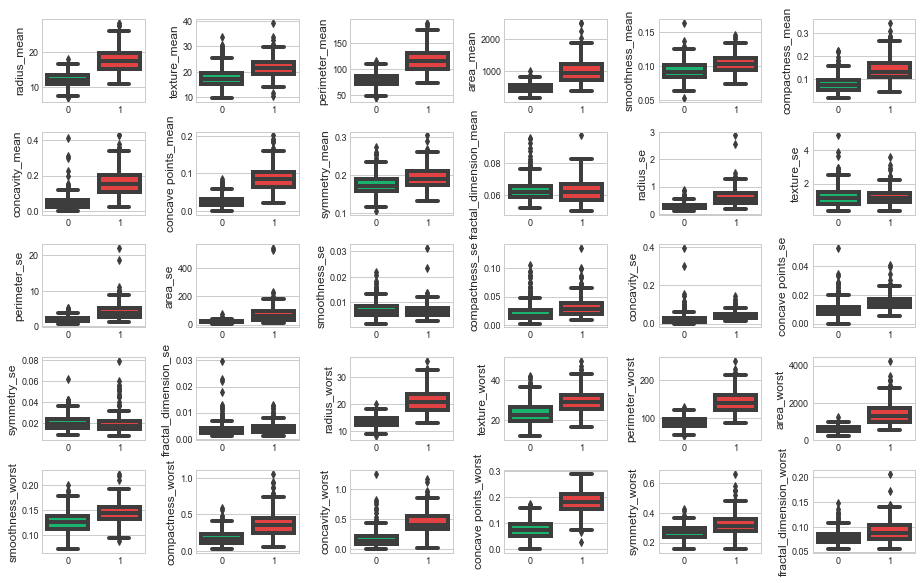

In [219]:
def box_plot_matrix(row, col, dataset, columns):
    fig, axs = plt.subplots(nrows=row, ncols=col, sharex='row')
    fig.set_figheight(8)
    fig.set_figwidth(13)
    fig.tight_layout()
    j = 0
    k = 0
    my_pal = {1:'#ff2727', 0:'#00cb72'}
    for i in range(row*col):
        if j == col:
            j = 0
            k += 1

        sns.boxplot(ax=axs[k, j], y=columns[i], x='diagnosis', data=dataset,
                   palette=my_pal)
        axs[k, j].set(xlabel=None)
        axs[k, j].set_ylabel(columns[i], fontsize=12)

        j += 1
    fig.tight_layout(pad=1)

box_plot_matrix(5, 6, dataset, columns)

#### From the above plot we see that there are multiple features that has outliers, however, due to ourdataset being small these may not be outliers but undersampled data

# Feature Engineering

#### Check for correlation between features

<AxesSubplot:>

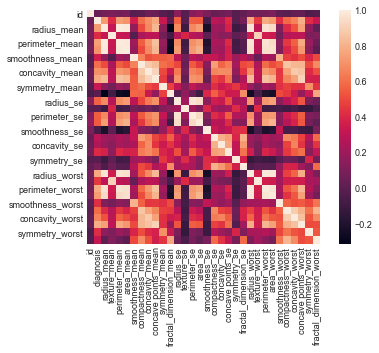

In [220]:
corr = dataset.corr()
sns.heatmap(corr, square=True)

#### It is difficult to get the highlt correlated features from the graph directly

In [221]:
corr.replace(1, 0, inplace=True)
corr_dict = {'Max correlated Feature' : corr.idxmax(),
             'Max correlation' : corr.max()}
highlyCorrFeatures = pd.DataFrame(corr_dict).sort_values(by='Max correlation', ascending=False)
highlyCorrFeatures.head(10)

,Max correlated Feature,Max correlation
radius_mean,perimeter_mean,0.997855
perimeter_mean,radius_mean,0.997855
perimeter_worst,radius_worst,0.993708
radius_worst,perimeter_worst,0.993708
area_mean,radius_mean,0.987357
area_worst,radius_worst,0.984015
perimeter_se,radius_se,0.972794
radius_se,perimeter_se,0.972794
area_se,radius_se,0.951830
concavity_mean,concave points_mean,0.921391


#### Try dropping features and check for the curve

In [222]:
for feature in highlyCorrFeatures.head(10).index:
    datasetCopy = dataset.drop(feature, axis=1).copy()
    x_trainC, x_testC, y_trainC, y_testC = trainTestSplit(datasetCopy)
    f1_score_model(f'Score after dropping *{feature}*', x_trainC, y_trainC, x_testC, y_testC)

The Score after dropping *radius_mean* is 0.5408
The Score after dropping *perimeter_mean* is 0.5408
The Score after dropping *perimeter_worst* is 0.5408
The Score after dropping *radius_worst* is 0.5408
The Score after dropping *area_mean* is 0.5408
The Score after dropping *area_worst* is 0.5810
The Score after dropping *perimeter_se* is 0.8522
The Score after dropping *radius_se* is 0.5408
The Score after dropping *area_se* is 0.5408
The Score after dropping *concavity_mean* is 0.5408


#### Dropping perimeter_se increased f1 score

In [223]:
dataset.drop('perimeter_se', axis=1, inplace=True)
x_train, x_test, y_train, y_test = trainTestSplit(dataset)

In [224]:
score = f1_score_model('SC', x_train, y_train, x_test, y_test)

The SC is 0.8522


# OverSampling train data

In [225]:
xSampled, ySampled = SMOTE(sampling_strategy='minority', random_state=2).fit_resample(x_train, y_train)
f1_score_model('Score after using ADASYN oversampling alg ', xSampled, ySampled, x_test, y_test)

The Score after using ADASYN oversampling alg  is 0.8679


0.8679245283018869

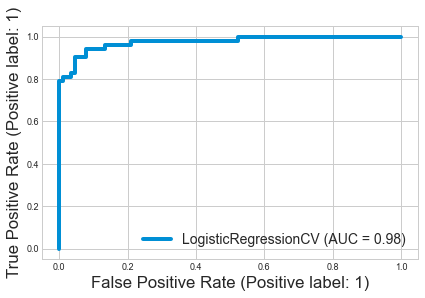

In [226]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LogisticRegressionCV().fit(xSampled, ySampled), x_test, y_test)


In [227]:
# Drop Id column from sampled dataset
xSampled.drop('id', axis=1, inplace=True)
columns = xSampled.columns.tolist()

In [228]:
# Scale data using MinMaxScaler()
mms = MinMaxScaler()
x_train_scaled = pd.DataFrame(mms.fit_transform(xSampled, ySampled), columns=columns)
x_test_scaled = pd.DataFrame(mms.transform(x_test.drop('id', axis=1)), columns=columns)

In [229]:
f1_score_model('f1 Score of the Scaled dataset', x_train_scaled, ySampled, x_test_scaled, y_test)

The f1 Score of the Scaled dataset is 0.9623


0.9622641509433962

In [230]:
final_xtrain, final_ytrain = x_train_scaled, ySampled
final_xtest, final_ytest = x_test_scaled, y_test

# Model Selection

In [231]:
def models_fit_score(model_, model_name, msg=True):
    '''Returns F1 score of the Model'''
    model_.fit(final_xtrain, final_ytrain)
    score = f1_score_model(f'F1 score of the {model_name} classifier', final_xtrain, final_ytrain,
                  final_xtest, final_ytest,print_msg=msg, model=model_)
    return score

## KNN

In [232]:
knn = KNeighborsClassifier()
models_fit_score(knn, 'Knn')

The F1 score of the Knn classifier is 0.9009


0.9009009009009009

In [233]:
d = {}
for k in range(30):
    knn = KNeighborsClassifier(n_neighbors=k+1)
    score = models_fit_score(knn, 'K', msg=False)
    d[k] = score


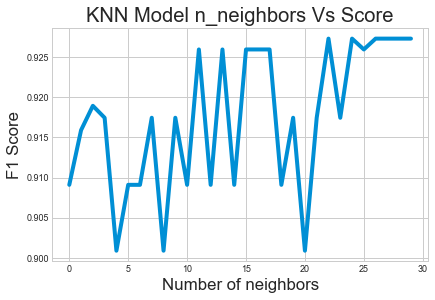

In [234]:
def dict_linePlot(dictionary, xlabel, ylabel, title):
    '''Plot a line plot from dictionary'''
    plt.plot(dictionary.keys(), dictionary.values())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
dict_linePlot(d, 'Number of neighbors', 'F1 Score', 
              'KNN Model n_neighbors Vs Score')

#### KNN score is lower than Linear regression model score

## SVM

In [235]:
svm = SVC()
models_fit_score(svm, 'svm')

The F1 score of the svm classifier is 0.9444


0.9444444444444444

## Decision Tree

In [236]:
dt = DecisionTreeClassifier(max_depth=5)
models_fit_score(dt, 'Decision Tree')

The F1 score of the Decision Tree classifier is 0.9107


0.9107142857142857

In [237]:
score_depth = {}
for depth in range(9):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth+1)
    score = models_fit_score(dt, 'Decision Tree', msg=False)
    score_depth[depth] = score

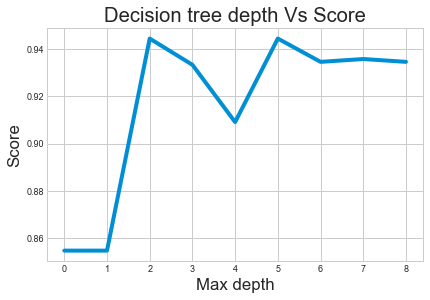

In [238]:
dict_linePlot(score_depth, 'Max depth', 'Score', 'Decision tree depth Vs Score')

## Bagging Classifier

In [239]:
bc = BaggingClassifier()
models_fit_score(bc, 'Bagging')

The F1 score of the Bagging classifier is 0.9444


0.9444444444444444

In [240]:
estimators_num = {}
for trees_num in range(1, 50):
    bc = BaggingClassifier(n_estimators=trees_num)
    score = models_fit_score(bc, 'Bagging', msg=False)
    estimators_num[trees_num] = score

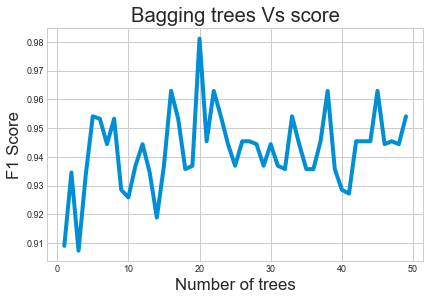

In [241]:
dict_linePlot(estimators_num, 'Number of trees', 'F1 Score', 'Bagging trees Vs score')

In [242]:
sorted(estimators_num.items(), key=lambda i: i[1], reverse=True)[0]

(20, 0.9811320754716981)

#### Maximum score will happen at 8 trees

## Random Forest

In [243]:
rf = RandomForestClassifier()
models_fit_score(rf, 'RandomForest')

The F1 score of the RandomForest classifier is 0.9369


0.9369369369369369

### ADA boost

In [244]:
ab = AdaBoostClassifier()
models_fit_score(ab, 'AdaBoost Classifier')

The F1 score of the AdaBoost Classifier classifier is 0.9444


0.9444444444444444

## GradientBoostingClassifier

In [245]:
gbc = GradientBoostingClassifier()
models_fit_score(gbc, 'Gradient Boosting Classifier')


The F1 score of the Gradient Boosting Classifier classifier is 0.9630


0.9629629629629629

## XGBOOST

In [246]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
models_fit_score(xgb_model, 'XGBOOST')

[13:53:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The F1 score of the XGBOOST classifier is 0.9444


C:\Users\Ali\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9444444444444444

## Voting Classifier

In [247]:
# Classifiers to be used
lr = LogisticRegressionCV(max_iter=10000)
bc2 = BaggingClassifier(n_estimators=36)

In [248]:
estimators = [('lr', xgb_model),
              ('BC', bc2)]
vc = VotingClassifier(estimators=estimators, voting='soft')

In [249]:
models_fit_score(vc, 'Voting Classifier')

C:\Users\Ali\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:53:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ali\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:53:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The F1 score of the Voting Classifier classifier is 0.9358


0.9357798165137615

#### The choosen classifier is Bagging Classifier

In [264]:
bc = BaggingClassifier(n_estimators=20, random_state=19)
models_fit_score(bc, 'Bagging Classifier')

The F1 score of the Bagging Classifier classifier is 0.9714


0.9714285714285713

# Feature Importance

In [268]:
perm = PermutationImportance(bc).fit(final_xtest, final_ytest)

In [272]:
eli5.show_weights(perm, feature_names=final_xtest.columns.tolist())

Weight,Feature
0.0392 ± 0.0190,concave points_mean
0.0378 ± 0.0190,texture_worst
0.0210 ± 0.0125,area_worst
0.0140 ± 0.0265,concavity_worst
0.0098 ± 0.0244,perimeter_worst
0.0070 ± 0.0088,area_se
0.0056 ± 0.0056,radius_worst
0.0014 ± 0.0105,radius_se
0.0014 ± 0.0056,smoothness_worst
0 ± 0.0000,smoothness_se


#### The most important 3 features in our model in:
1. Concave Points mean
2. Texture Worst 
3. Area Worst